>### ZFNet

In [1]:
import numpy as np
import cv2
import matplotlib.pyplot as plt
%matplotlib inline
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers, regularizers

#### Data

In [149]:
def preprocess(image): 
    image = cv2.resize(image,(224,224))
    image = image[np.newaxis,...]
    image = image/255.0 
    return image 

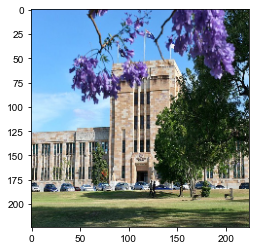

In [151]:
image = plt.imread('images/uq.jpg')
image = preprocess(image)
plt.imshow(image[0])

#### Model

In [192]:
def ZFNet():
    inputs = keras.Input(shape=(224,224,3))
    # Conv层，用于提取特征
    l1 = layers.Conv2D(96, 7, 2, activation='relu')(inputs)
    x, idx1 = tf.nn.max_pool_with_argmax(l1, 3, 2, 'VALID')
    l2 = layers.Conv2D(256, 5, 2, activation='relu')(x)
    x, idx2 = tf.nn.max_pool_with_argmax(l2, 3, 2, 'VALID')
    l3 = layers.Conv2D(384, 3, padding='same', activation='relu')(x)
    l4 = layers.Conv2D(384, 3, padding='same', activation='relu')(l3)
    l5 = layers.Conv2D(256, 3, padding='same', activation='relu')(l4)
    x, idx3 = tf.nn.max_pool_with_argmax(l5, 3, 2, 'VALID')
    x = layers.Flatten()(x)
    x = layers.Dense(4096, activation='relu')(x)
    x = layers.Dense(4096, activation='relu')(x)
    x = layers.Dense(1000, activation='relu')(x)
    model = keras.Model(inputs = inputs, outputs = [x, (l1, l2, l3, l4, l5)], name='ZFNet')
    
    # DeConv层，用于可视化
    f1 = layers.Conv2DTranspose(3, 8, 2)(l1)
    return model

In [193]:
model = ZFNet()
model.summary()

Model: "ZFNet"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_23 (InputLayer)        [(None, 224, 224, 3)]     0         
_________________________________________________________________
conv2d_278 (Conv2D)          (None, 109, 109, 96)      14208     
_________________________________________________________________
tf.nn.max_pool_with_argmax_9 MaxPoolWithArgmax(output= 0         
_________________________________________________________________
conv2d_279 (Conv2D)          (None, 25, 25, 256)       614656    
_________________________________________________________________
tf.nn.max_pool_with_argmax_1 MaxPoolWithArgmax(output= 0         
_________________________________________________________________
conv2d_280 (Conv2D)          (None, 12, 12, 384)       885120    
_________________________________________________________________
conv2d_281 (Conv2D)          (None, 12, 12, 384)       132748

In [200]:
def plot_feature_map(feature_maps):
    plt.figure(figsize=(10,10))
    for i in range(5):
        for j in range(5):
            plt.subplot(5,5,i*5+(j+1))
            plt.imshow(feature_maps[i][0,...,j])
            plt.grid(False)
            plt.axis(False)
    plt.show();

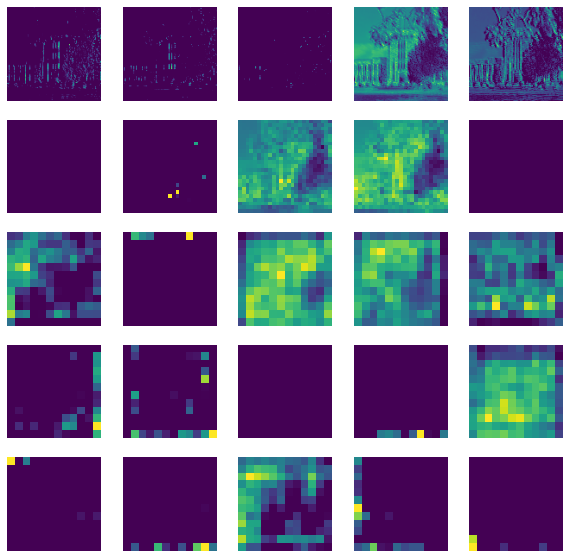

In [203]:
prediction, feature_maps = model(image)
plot_feature_map(feature_maps)